In [1]:
import pyforest
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,5]


In [2]:
sales = pd.read_csv("../data-sets/bigmartsales-cleaned.csv")
sales.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


#### Data Summary

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
sales.Outlet_Establishment_Year = sales.Outlet_Establishment_Year.astype(object)

#### Data Summary Analysis

In [5]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


* In the Count Obervation the Item Weight is having missing values - its defect
* In the Mean value Observations the Mean of Item_Outlet_Sales are having slight diffrence is mean and 50% of its values distibutions - its defect as Right Sqewed
* Missing values on Item_Weight and Item_Visibility columns as they are having min as Zero, as they cannot be zero at any given scenario

In [6]:
sales.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,9,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,1463,2793,2793,5577


There are missing values in Outlet_Size and Location_Type features - defect

In [7]:
num_data = sales.select_dtypes(include=np.number)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

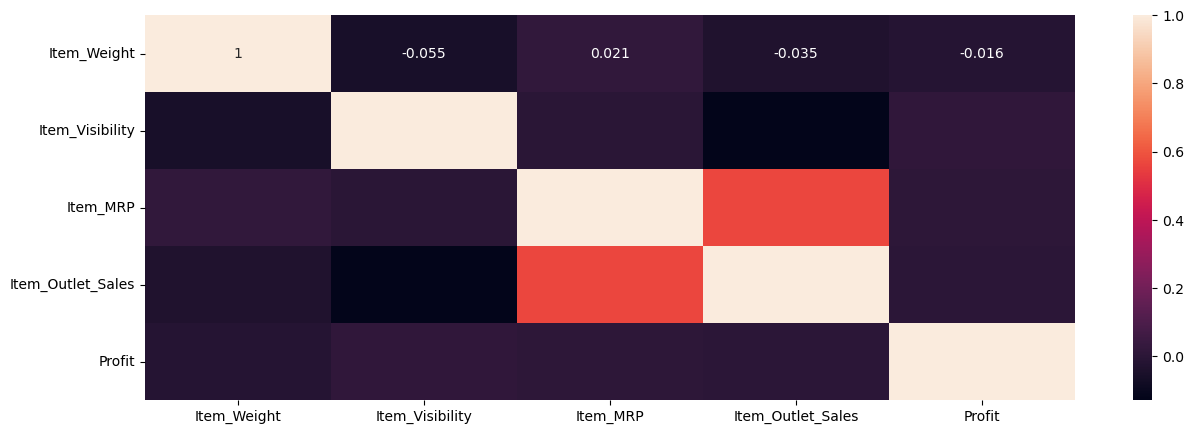

In [8]:
sns.heatmap(num_data.corr(), annot=True)

### 2. Missing Valaues

In [9]:
sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

List out the Missing Value count and the percentage of data in the data set

In [10]:
total = sales.isnull().sum().sort_values(ascending=False)
percent = (sales.isnull().sum() / sales.shape[0])*100
percent = percent.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

<IPython.core.display.Javascript object>

,Total,Percent
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


<IPython.core.display.Javascript object>

<Axes: >

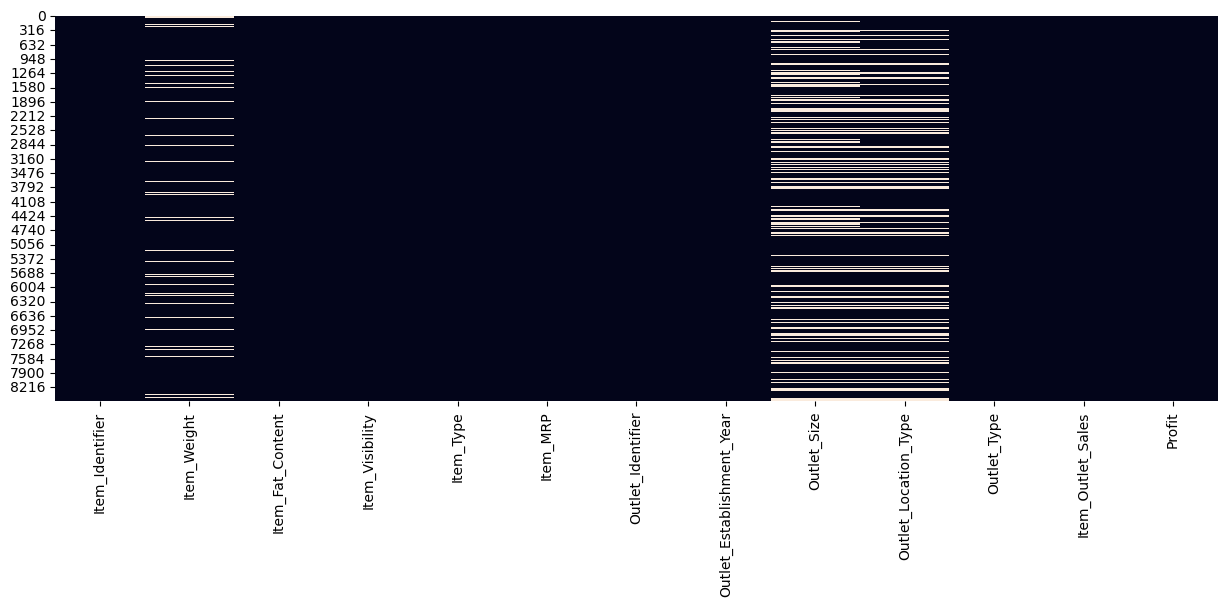

In [11]:
sns.heatmap(sales.isnull(), cbar=False)

In [14]:
sales_droped = sales.dropna()
sales.shape, sales_droped.shape

((8523, 13), (5364, 13))

Here 8523 - 5364 records are dropped, So 37.06 percent of data is lost. 

So here we cannot drop the table, We have to go with imputation


### 1. The Variable Outlet_Size

In [15]:
sales.Outlet_Size.value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [18]:
sales.Outlet_Size.replace(np.NaN, "Medium", inplace=True)

sales.Outlet_Size.isnull().sum()

<IPython.core.display.Javascript object>

0

### 2. Outlet_Location_Type

In [19]:
sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: count, dtype: int64

On this Feature the Missing Values are Non Standard Missing values, which are given by the client. where it cannot be identifiable by Machine intellegence

In [ ]:
# Convert the Non Standard Values to NaN  then use then to raplace
sales.Outlet_Location_Type.replace(to_replace="?", value=np.NaN, inplace=True) 
sales.Outlet_Location_Type.replace(to_replace="  --", value=np.NaN, inplace=True)
sales.Outlet_Location_Type.replace(to_replace="  -", value=np.NaN, inplace=True)
sales.Outlet_Location_Type.replace(to_replace="na", value=np.NaN, inplace=True)
sales.Outlet_Location_Type.replace(to_replace="NAN", value=np.NaN, inplace=True)

In [21]:
sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
Name: count, dtype: int64

We have to check whether all the locations are performing the same sales are not. If it is same, we can replace nulls with any available locations

In [22]:
sales_impute = sales[['Item_Outlet_Sales', 'Outlet_Location_Type']].dropna()
sales_impute = sales_impute.groupby(sales_impute.Outlet_Location_Type).mean()

sales_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


In [32]:
index = np.where(sales.Outlet_Location_Type.isnull())[0]

for ind in index:
    if sales.loc[ind, 'Item_Outlet_Sales'] <= 2100:
        sales.loc[ind, 'Outlet_Location_Type'] = "Tier1"
    elif sales.loc[ind, 'Item_Outlet_Sales'] >= 2500:
        sales.loc[ind, 'Outlet_Location_Type'] = "Tier 2"
    else:
        sales.loc[ind, 'Outlet_Location_Type'] = "Tier 3"

<IPython.core.display.Javascript object>

In [26]:
sales.Outlet_Location_Type.isnull().sum()

0

In [33]:
sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier1     3947
Tier 2    3483
Tier 3    1093
Name: count, dtype: int64

### 3. The Variable Item_Weight

In [35]:
sales.Item_Weight.describe()


count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [36]:
# Defect witht this feature is replace the min values with NaN and then impute the values
sales.Item_Weight.replace(0, np.NaN, inplace=True)

<IPython.core.display.Javascript object>

In [37]:
sales.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [38]:
sales.Item_Weight.skew()

0.0824262091221237

In [40]:
sales.Item_Weight.fillna(sales.Item_Weight.median(), inplace=True)
sales.Item_Weight.describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

### 4. Item_Visibility

In [41]:
sales.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [42]:
sales.Item_Visibility.replace(0,sales.Item_Visibility.mean(), inplace=True)
sales.Item_Visibility.describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<IPython.core.display.Javascript object>

<Axes: >

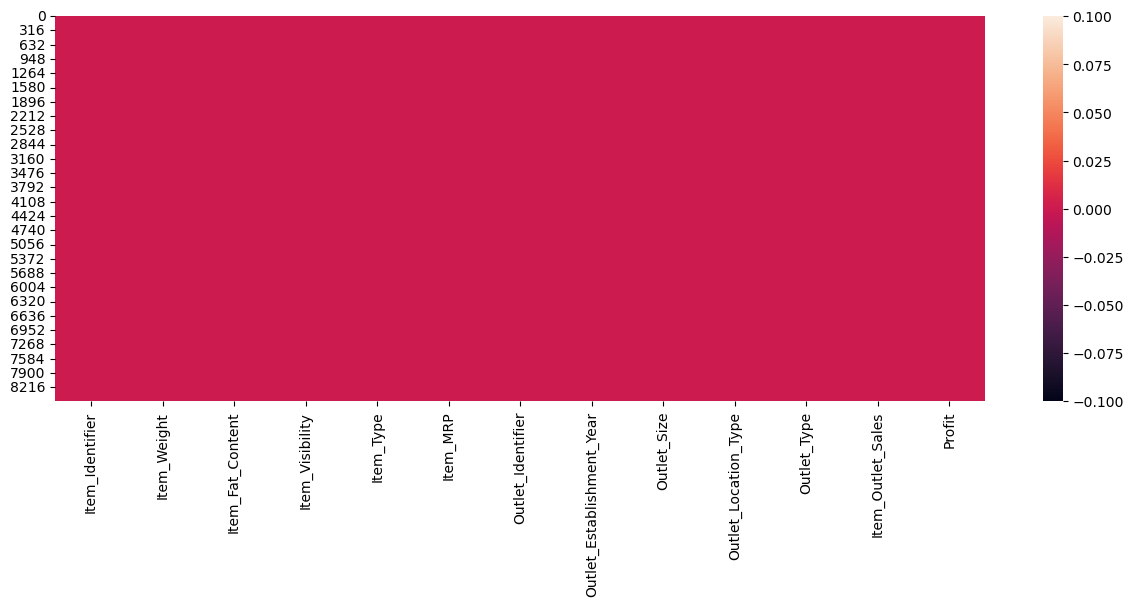

In [43]:
sns.heatmap(sales.isnull())

## Handling of Non Numerical Data

**Types of ways the Categorical values can be treated**
* N-1 Dummy Encoding
* One Hot Encoding
* Label Encoding
* Ordinal Encoding
* Frequency Encoding
* Target Encoding

In [44]:
sales.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,9,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier1,Supermarket Type1
freq,10,5517,1232,935,1463,5203,3947,5577


In [45]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### One Hot Encoding

In [47]:
test = pd.get_dummies(sales, columns=["Item_Type"], dtype=int)
test.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.066132,182.1,OUT010,1998,Medium,Tier1,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.066132,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [50]:
test1 = pd.get_dummies(sales, columns=['Item_Type'], drop_first=True, dtype=int)
test1.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.066132,182.1,OUT010,1998,Medium,Tier1,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.066132,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   object 
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   object 
 7   Outlet_Size                      8523 non-null   object 
 8   Outlet_Location_Type             8523 non-null   object 
 9   Outlet_Type                      8523 non-null   object 
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Profit                           8523 non-null   float64
 12  Item_Type_Baking Goo

In [51]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   object 
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   object 
 7   Outlet_Size                      8523 non-null   object 
 8   Outlet_Location_Type             8523 non-null   object 
 9   Outlet_Type                      8523 non-null   object 
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Profit                           8523 non-null   float64
 12  Item_Type_Breads    

In [57]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder()

sales_encode = pd.DataFrame(encode.fit_transform(sales[["Outlet_Type"]]).toarray(), columns=["Grocery Store", 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3' ]
                            )
sales_encode = pd.concat([sales, sales_encode], axis=1)

sales_encode.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0.0,1.0,0.0,0.0


In [54]:
sales_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
 13  Grocery Store              8523 non-null   float

### Label Encoding

In [59]:
sales.Outlet_Size.value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sales['Label_Encoded_Outlet_Size'] = label_encoder.fit_transform(sales.Outlet_Size)

sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0
